<a href="https://colab.research.google.com/github/bintangsholu21/Pembelajaran-Mesin/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UTS Pembelajaran Mesin**
#### **Segmentasi Gambar dengan Clustering**

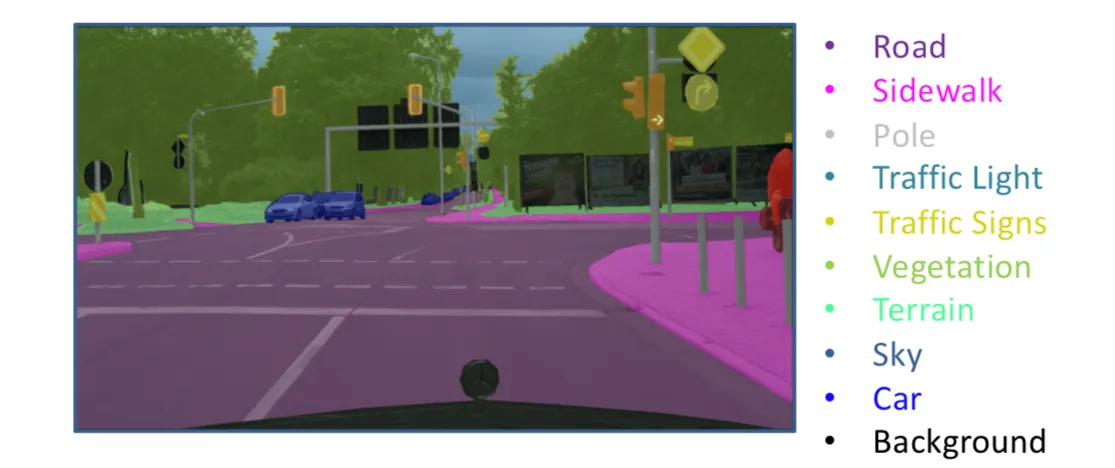

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

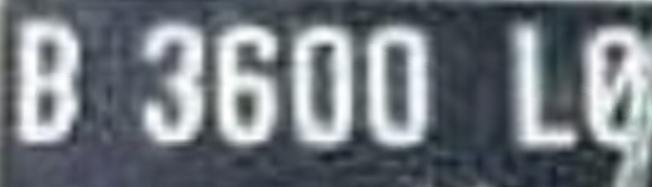

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

---

## **Jawab**

#### **Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Import Library**

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import MiniBatchKMeans
import glob

#### **Load Data**

In [3]:
images = []
for img in glob.glob("/content/drive/MyDrive/Machine Learning/dummy/*"):
    n= cv2.imread(img)
    images.append(n)

#### **Memilih gambar ke 1 hingga 5**

In [4]:
selected_images = images[1:5]

#### **Rescale nilai piksel dari `[0, 255]` menjadi `[0, 1]` dan Change format data gambar menjadi data dua dimensi**

In [5]:
def scale_data(img):
    h, w, ch= img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)
    return data

#### **Plotting data menjadi 3D untuk segmentasi warna**

In [6]:
def plot_pixels_3d(data, title, colors=None, N=10000, ax=None):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    ax.scatter(R, G, B, c=colors, marker='.')
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    ax.set_title(title, size=14)

#### **Compare Original Image dengan Hasil Segmentasi Gambar**

In [7]:
def img_comparison(original, new_colors):
    new_plate = new_colors.reshape(original.shape)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(new_plate)
    ax[1].set_title('2-color Image', size=16);

#### **Implementasi Algoritma K-Means**

In [8]:
def kmeans_cluster(original):
    data = scale_data(original) # Inisiasi data gambar
    kmeans = MiniBatchKMeans(2,n_init=3) # Proses kmeans clustering
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'}) # Membuat sebuah gambar yang menampilkan dua subplot (grafik sisi-sisi)

    # subplot pertama
    plot_pixels_3d(data, "16 million possible colors", ax=ax1)

    # subplot kedua
    plot_pixels_3d(data, "2 colors", colors=new_colors, ax=ax2)
    plt.show()
    img_comparison(original, new_colors)

#### **Hasil Image 1**

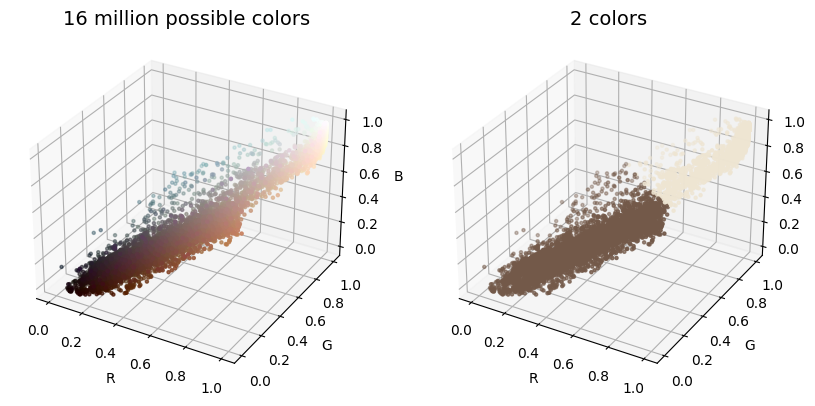

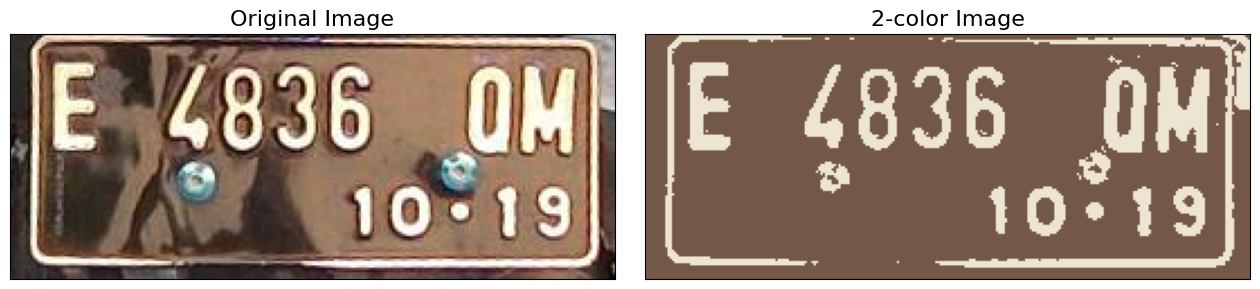

In [9]:
    kmeans_cluster(images[1])

#### **Hasil Image 2**

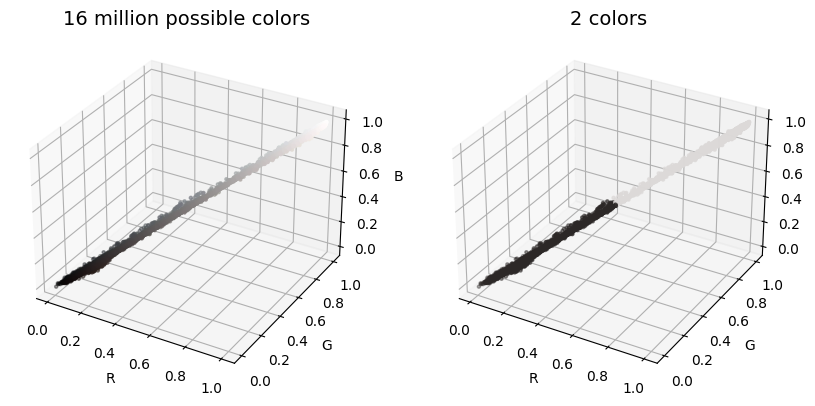

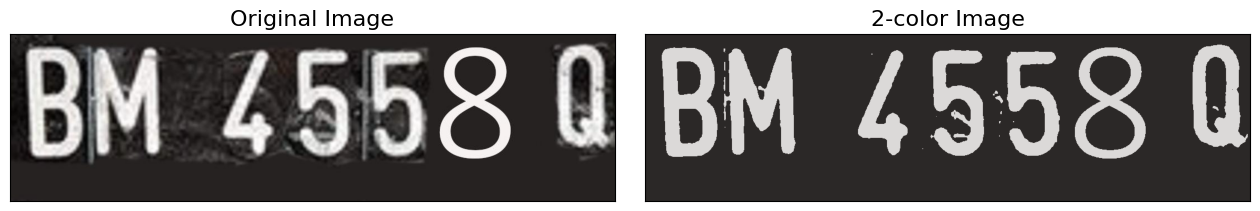

In [10]:
    kmeans_cluster(images[2])

#### **Hasil Image 3**

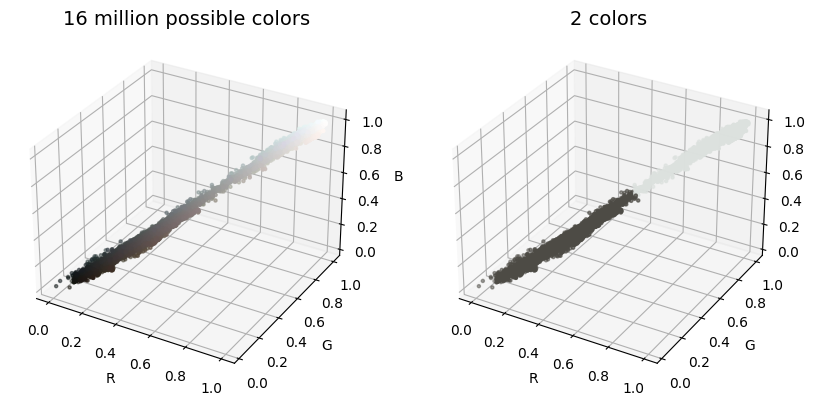

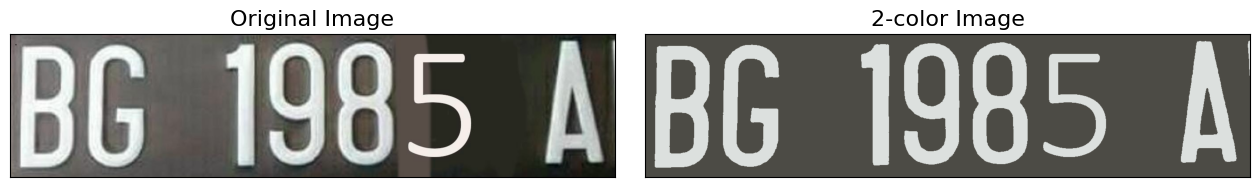

In [11]:
    kmeans_cluster(images[3])

#### **Hasil Image 4**

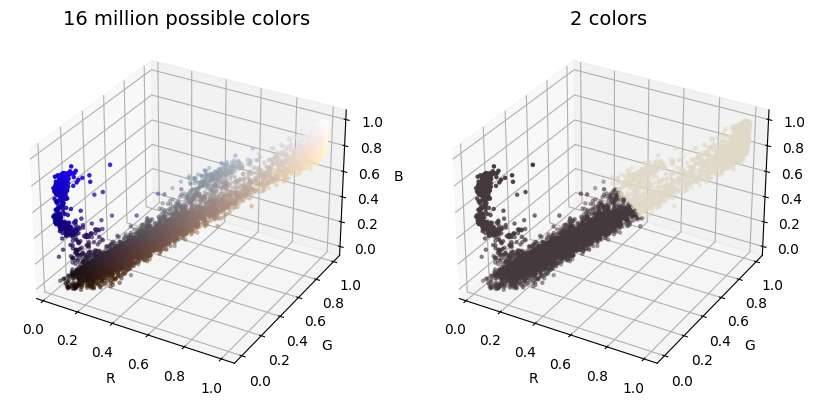

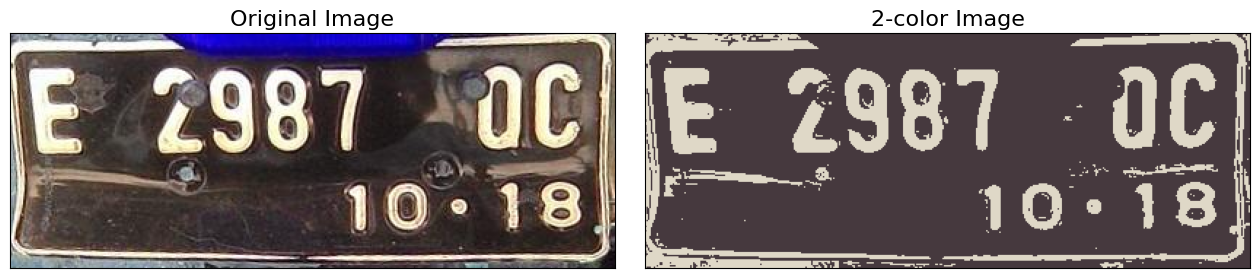

In [12]:
    kmeans_cluster(images[4])

#### **Hasil Image 5**

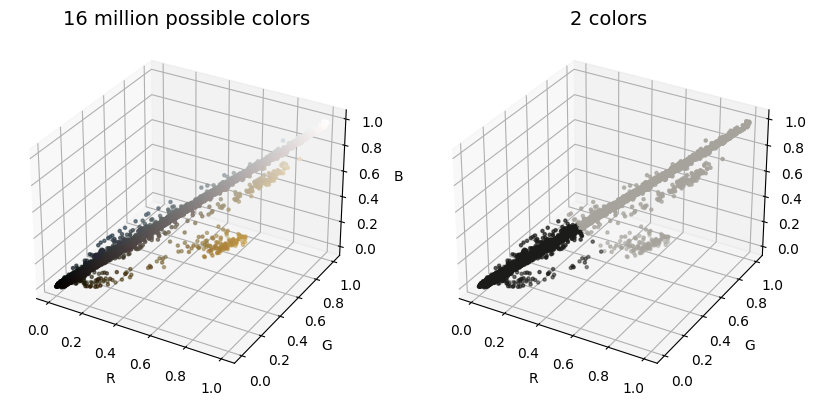

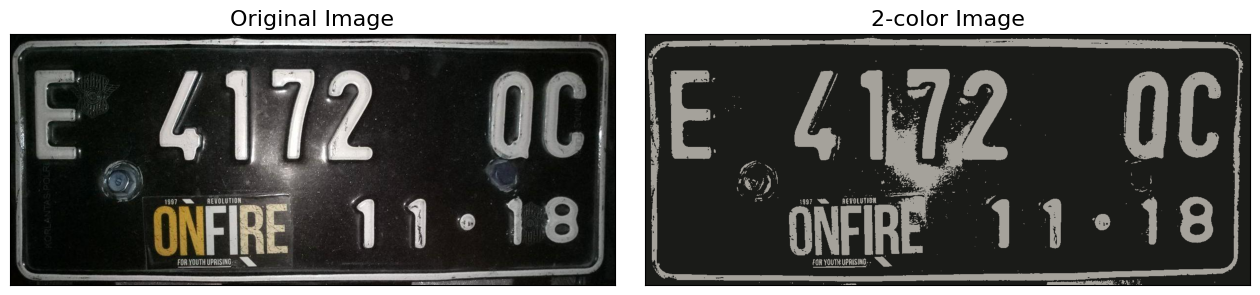

In [13]:
    kmeans_cluster(images[5])